<a href="https://colab.research.google.com/github/kibria282096/Rainfall_prediction_Bd__Machine_Learning/blob/main/rainfall_prediction_bd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path= '/content/drive/MyDrive/kibria/Final-Rainfall_Report.csv'
df = pd.read_csv(file_path)
# Preview the dataset
print(df.head())

   SL.          Station    Year  Month  Total_Rainfall_(mm)  \
0  1.0  Syedpur (41858)  1950.0    1.0                  0.0   
1  2.0  Ambagan (41977)  1950.0    1.0                  0.0   
2  3.0  Barisal (11704)  1950.0    1.0                  0.0   
3  4.0    Bhola (11706)  1950.0    1.0                  0.0   
4  5.0    Bogra (10408)  1950.0    1.0                  0.0   

   Cloud Coverage (Octs)  Humidity  Maximum_Temperature  Minimum_Temperature  \
0                   0.39     77.26                25.42                10.05   
1                   1.21     68.93                26.79                10.87   
2                   1.26     62.45                31.81                15.53   
3                   1.07     49.60                33.62                18.86   
4                   3.39     71.48                33.72                23.84   

   Sunshine  Windspeed    Eto    PET Rainfall  Pressure WindDir  \
0      7.14       1.68  19.30  21.21       NO    1007.7       W   
1     

<ipython-input-4-7f8695ee25dd>:2: DtypeWarning: Columns (1,13,15,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [5]:
df.describe()

,SL.,Year,Month,Total_Rainfall_(mm),Cloud Coverage (Octs),Humidity,Maximum_Temperature,Minimum_Temperature,Sunshine,Windspeed,Eto,PET,Pressure,WindGustSpeed
count,30660.000000,30660.000000,30660.000000,30660.000000,30660.00000,30660.000000,30660.000000,30660.000000,30660.000000,30660.000000,30660.000000,30660.000000,23996.000000,29852.000000
mean,15330.500000,1986.000000,6.500000,155.626745,3.51834,79.822614,30.515018,20.999759,6.186126,2.650769,35.891748,39.441487,1018.235698,11.824434
std,8850.923963,21.071651,3.452109,228.687990,2.09623,7.237932,2.881006,5.092402,1.874436,20.725982,10.762094,11.826455,6.559427,9.049751
min,1.000000,1950.000000,1.000000,0.000000,0.00000,33.900000,16.950000,6.180000,0.000000,0.000000,8.380000,9.220000,980.500000,0.000000
25%,7665.750000,1968.000000,3.750000,0.000000,1.58000,75.430000,28.870000,16.630000,4.770000,0.620000,27.240000,29.930000,1013.900000,4.000000
50%,15330.500000,1986.000000,6.500000,36.000000,3.35000,80.940000,31.210000,23.120000,6.370000,1.090000,35.890000,39.440000,1018.300000,11.000000
75%,22995.250000,2004.000000,9.250000,249.000000,5.55000,85.500000,32.440000,25.400000,7.650000,1.790000,43.460000,47.760000,1022.700000,17.000000
max,30660.000000,2022.000000,12.000000,2072.000000,7.87000,96.060000,39.640000,28.150000,10.980000,835.000000,78.540000,86.280000,1039.900000,130.000000


In [6]:
df.shape

(145460, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SL.                    30660 non-null  float64
 1   Station                30660 non-null  object 
 2   Year                   30660 non-null  float64
 3   Month                  30660 non-null  float64
 4   Total_Rainfall_(mm)    30660 non-null  float64
 5   Cloud Coverage (Octs)  30660 non-null  float64
 6   Humidity               30660 non-null  float64
 7   Maximum_Temperature    30660 non-null  float64
 8   Minimum_Temperature    30660 non-null  float64
 9   Sunshine               30660 non-null  float64
 10  Windspeed              30660 non-null  float64
 11  Eto                    30660 non-null  float64
 12  PET                    30660 non-null  float64
 13  Rainfall               30660 non-null  object 
 14  Pressure               23996 non-null  float64
 15  

In [8]:
df = df.drop(["SL.","Station","Year"], axis=1)
df.head

<bound method NDFrame.head of         Month  Total_Rainfall_(mm)  Cloud Coverage (Octs)  Humidity  \
0         1.0                  0.0                   0.39     77.26   
1         1.0                  0.0                   1.21     68.93   
2         1.0                  0.0                   1.26     62.45   
3         1.0                  0.0                   1.07     49.60   
4         1.0                  0.0                   3.39     71.48   
...       ...                  ...                    ...       ...   
145455    NaN                  NaN                    NaN       NaN   
145456    NaN                  NaN                    NaN       NaN   
145457    NaN                  NaN                    NaN       NaN   
145458    NaN                  NaN                    NaN       NaN   
145459    NaN                  NaN                    NaN       NaN   

        Maximum_Temperature  Minimum_Temperature  Sunshine  Windspeed    Eto  \
0                     25.42                10.05      7.14       1.68  19.30   
1                     26.79                10.87      7.99       1.64  17.99   
2                     31.81                15.53      8.66       1.95  21.85   
3                     33.62                18.86      6.55       2.08  30.31   
4                     33.72                23.84      7.12       2.13  31.90   
...                     ...                  ...       ...        ...    ...   
145455                  NaN                  NaN       NaN        NaN    NaN   
145456                  NaN                  NaN       NaN        NaN    NaN   
145457                  NaN                  NaN       NaN        NaN    NaN   
145458                  NaN                  NaN       NaN        NaN    NaN   
145459                  NaN                  NaN       NaN        NaN    NaN   

          PET Rainfall  Pressure WindDir  WindGustSpeed WindGustDir  \
0       21.21       NO    1007.7       W           20.0           W   
1       19.76       NO    1010.6     NNW            4.0         WNW   
2       24.01       NO    1007.6       W           19.0         WSW   
3       33.30       NO    1017.6      SE           11.0          NE   
4       35.05       NO    1010.8     ENE            7.0           W   
...       ...      ...       ...     ...            ...         ...   
145455    NaN      NaN       NaN     NaN            NaN         NaN   
145456    NaN      NaN       NaN     NaN            NaN         NaN   
145457    NaN      NaN       NaN     NaN            NaN         NaN   
145458    NaN      NaN       NaN     NaN            NaN         NaN   
145459    NaN      NaN       NaN     NaN            NaN         NaN   

       Rainfall_In_Future  
0                      No  
1                      No  
2                      No  
3                      No  
4                      No  
...                   ...  
145455                NaN  
145456                NaN  
145457                NaN  
145458                NaN  
145459                NaN  

[145460 rows x 16 columns]>

In [9]:
df = df.dropna(axis=0)
df.shape

(20947, 16)

In [10]:
df.columns

Index(['Month', 'Total_Rainfall_(mm)', 'Cloud Coverage (Octs)', 'Humidity',
       'Maximum_Temperature', 'Minimum_Temperature', 'Sunshine', 'Windspeed',
       'Eto', 'PET', 'Rainfall', 'Pressure', 'WindDir', 'WindGustSpeed',
       'WindGustDir', 'Rainfall_In_Future'],
      dtype='object')

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df['WindDir'] = le.fit_transform(df['WindDir'])
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df['Rainfall'] = le.fit_transform(df['Rainfall'])
df['Rainfall_In_Future'] = le.fit_transform(df['Rainfall_In_Future'])

<ipython-input-11-fdd80812c774>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
<ipython-input-11-fdd80812c774>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WindDir'] = le.fit_transform(df['WindDir'])
<ipython-input-11-fdd80812c774>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [12]:
x = df.drop(['Rainfall_In_Future'], axis = 1)
y = df['Rainfall_In_Future']


In [13]:
x.head()

,Month,Total_Rainfall_(mm),Cloud Coverage (Octs),Humidity,Maximum_Temperature,Minimum_Temperature,Sunshine,Windspeed,Eto,PET,Rainfall,Pressure,WindDir,WindGustSpeed,WindGustDir
0,1.0,0.0,0.39,77.26,25.42,10.05,7.14,1.68,19.30,21.21,0,1007.7,13,20.0,13
1,1.0,0.0,1.21,68.93,26.79,10.87,7.99,1.64,17.99,19.76,0,1010.6,6,4.0,14
2,1.0,0.0,1.26,62.45,31.81,15.53,8.66,1.95,21.85,24.01,0,1007.6,13,19.0,15
3,1.0,0.0,1.07,49.60,33.62,18.86,6.55,2.08,30.31,33.30,0,1017.6,9,11.0,4
4,1.0,0.0,3.39,71.48,33.72,23.84,7.12,2.13,31.90,35.05,0,1010.8,1,7.0,13


<Axes: xlabel='Maximum_Temperature', ylabel='Minimum_Temperature'>

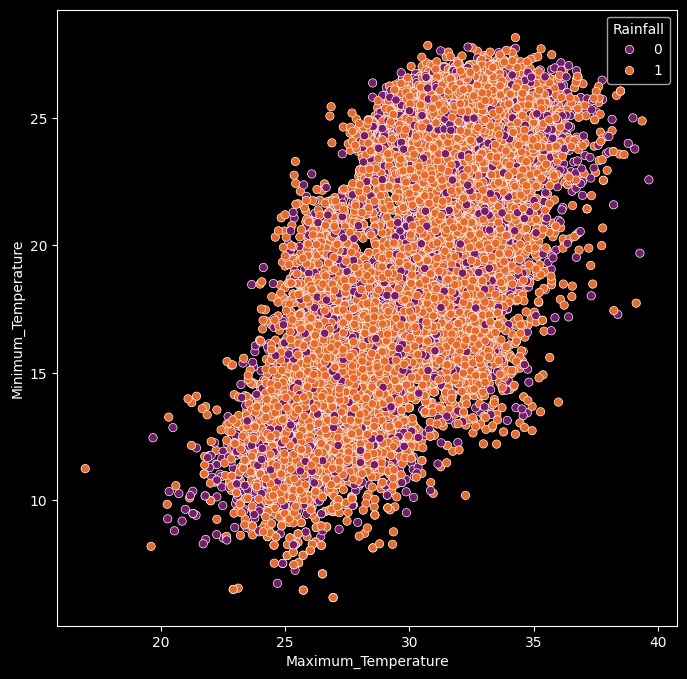

In [14]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'Maximum_Temperature', y = 'Minimum_Temperature', hue = 'Rainfall' , palette = 'inferno',data = df)

<Axes: xlabel='Humidity', ylabel='Maximum_Temperature'>

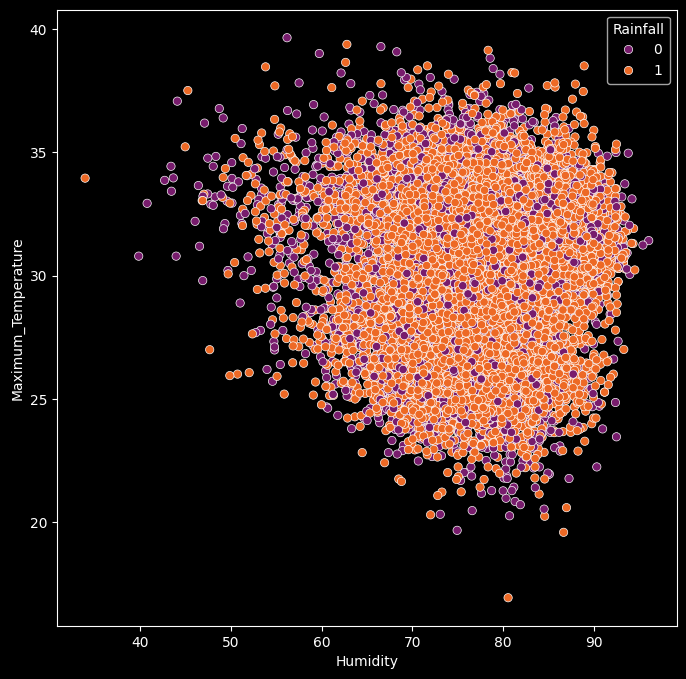

In [15]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'Humidity', y = 'Maximum_Temperature', hue = 'Rainfall' , palette = 'inferno',data = df)

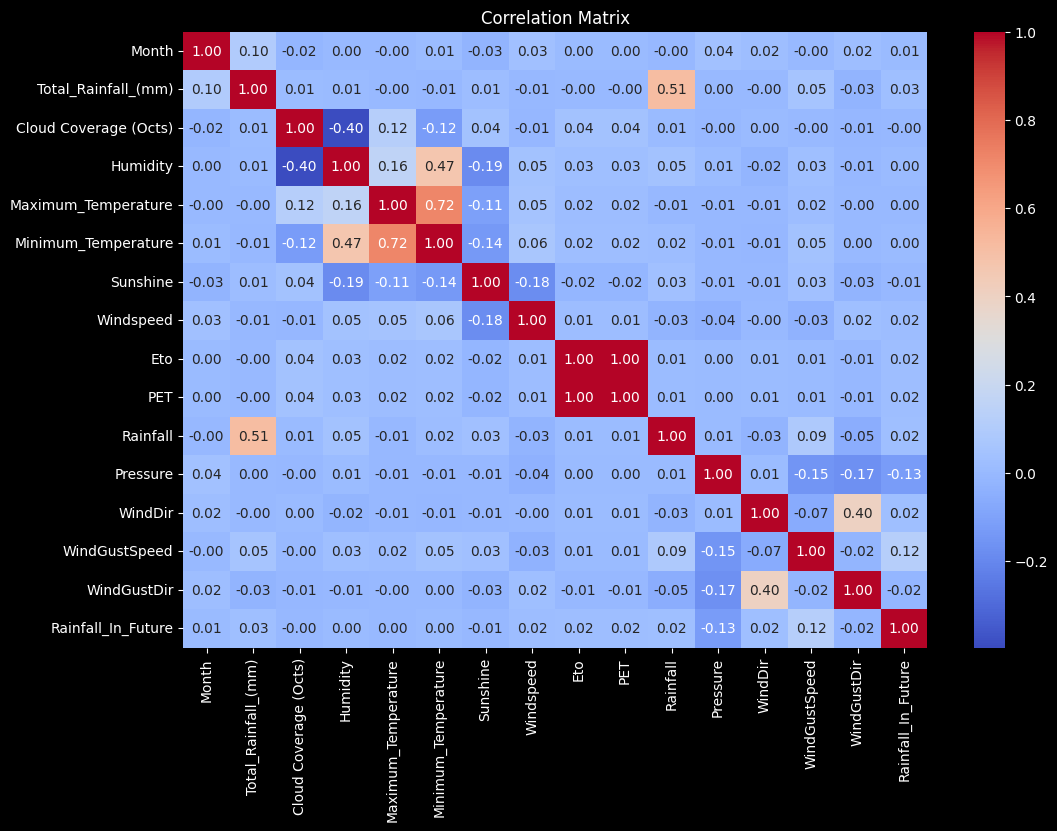

In [17]:
import seaborn as sns


# Assuming 'df' is your DataFrame containing the data
# Generate a correlation matrix
corr_matrix = df.corr()

# Set up the figure size
plt.figure(figsize=(12, 8))

# Create a heatmap with annotations
heatmap = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")

# Set the title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
predictions1 = lr.predict(x_test)
print(confusion_matrix(y_test, predictions1))
print(classification_report(y_test, predictions1))
print(accuracy_score(y_test, predictions1))

[[3222    2]
 [ 964    2]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      3224
           1       0.50      0.00      0.00       966

    accuracy                           0.77      4190
   macro avg       0.63      0.50      0.44      4190
weighted avg       0.71      0.77      0.67      4190

0.7694510739856802


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


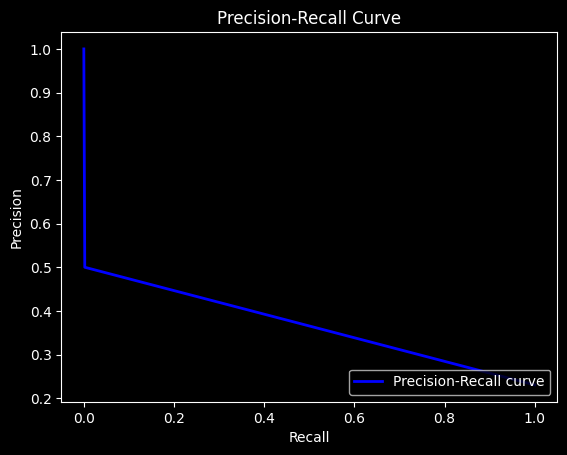

In [20]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, predictions1)

plt.plot(recall, precision, color='b', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.show()

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
predictions2 = dt.predict(x_test)
print(confusion_matrix(y_test, predictions2))
print(classification_report(y_test, predictions2))
print(accuracy_score(y_test, predictions2))

[[2527  697]
 [ 673  293]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.79      3224
           1       0.30      0.30      0.30       966

    accuracy                           0.67      4190
   macro avg       0.54      0.54      0.54      4190
weighted avg       0.68      0.67      0.67      4190

0.6730310262529833


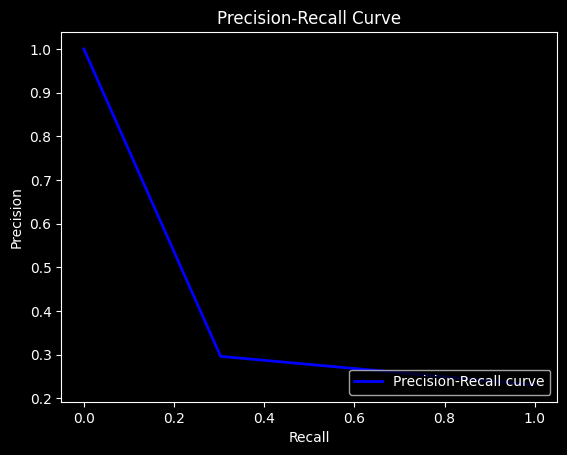

In [22]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, predictions2)

plt.plot(recall, precision, color='b', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.show()

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predictions3 = rf.predict(x_test)

# Perform k-fold cross-validation (e.g., k=5)
k = 10
cv_scores = cross_val_score(rf, x, y, cv=k)

# Print cross-validation scores
print("Cross-Validation Scores:")
print(cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

# Make predictions using cross-validated model
y_pred_cv = cross_val_predict(rf, x, y, cv=k)
print(confusion_matrix(y_test, predictions3))
print(classification_report(y_test, predictions3))
print(accuracy_score(y_test, predictions3))

Cross-Validation Scores:
[0.77708831 0.76706444 0.76945107 0.77279236 0.74653938 0.77231504
 0.76229117 0.75596944 0.76552053 0.77268386]
Mean Accuracy: 0.7661715596100235
[[3198   26]
 [ 916   50]]
              precision    recall  f1-score   support

           0       0.78      0.99      0.87      3224
           1       0.66      0.05      0.10       966

    accuracy                           0.78      4190
   macro avg       0.72      0.52      0.48      4190
weighted avg       0.75      0.78      0.69      4190

0.7751789976133652


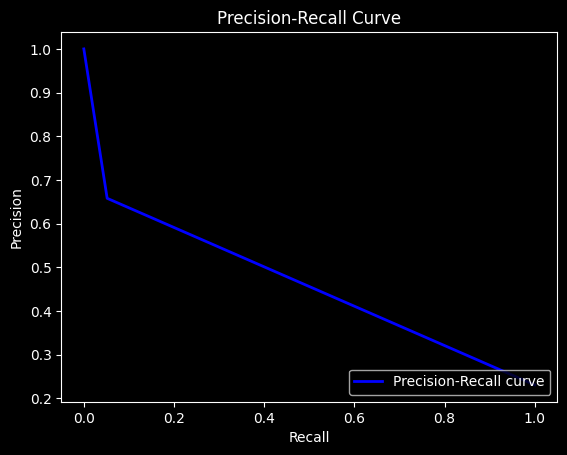

In [25]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, predictions3)

plt.plot(recall, precision, color='b', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.show()

In [26]:
from sklearn.svm import SVC  # Import Support Vector Classifier
svm = SVC()
svm.fit(x_train,y_train)
predictions4 = svm.predict(x_test)
print(confusion_matrix(y_test, predictions4))
print(classification_report(y_test, predictions4))
print(accuracy_score(y_test, predictions4))

[[3224    0]
 [ 966    0]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      3224
           1       0.00      0.00      0.00       966

    accuracy                           0.77      4190
   macro avg       0.38      0.50      0.43      4190
weighted avg       0.59      0.77      0.67      4190

0.7694510739856802


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


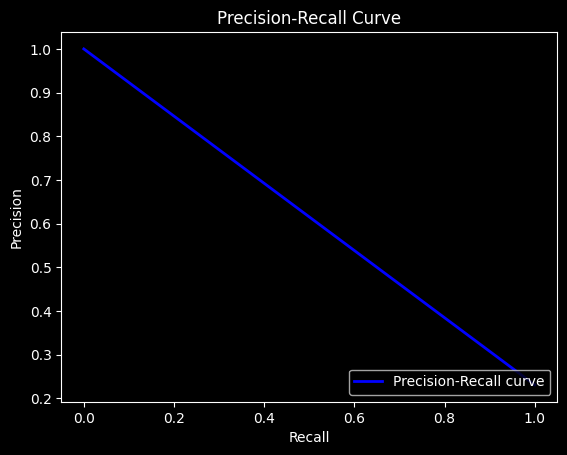

In [27]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, predictions4)

plt.plot(recall, precision, color='b', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.show()

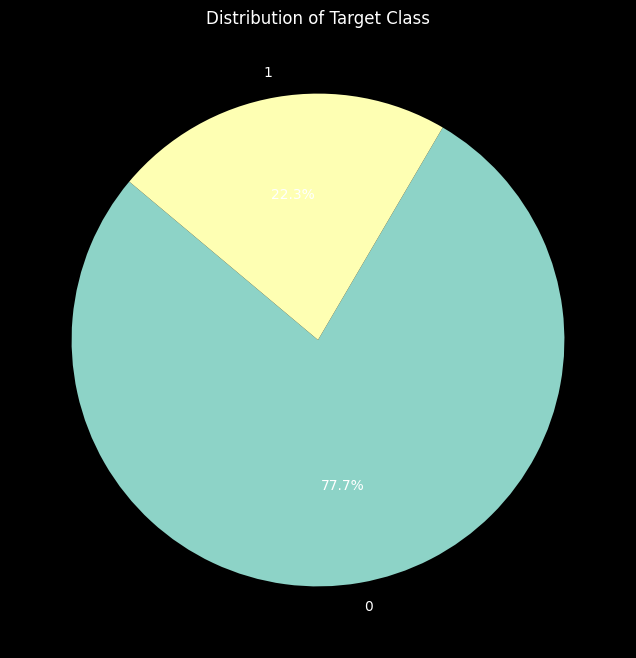

In [28]:
# Example: Create a DataFrame with a target variable 'target_class'
# Calculate class frequencies
class_counts = df['Rainfall_In_Future'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))  # Set the size of the pie chart

# Plotting the pie chart with labels
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Distribution of Target Class')

# Show the pie chart
plt.show()

IndexError: index 3 is out of bounds for axis 0 with size 3

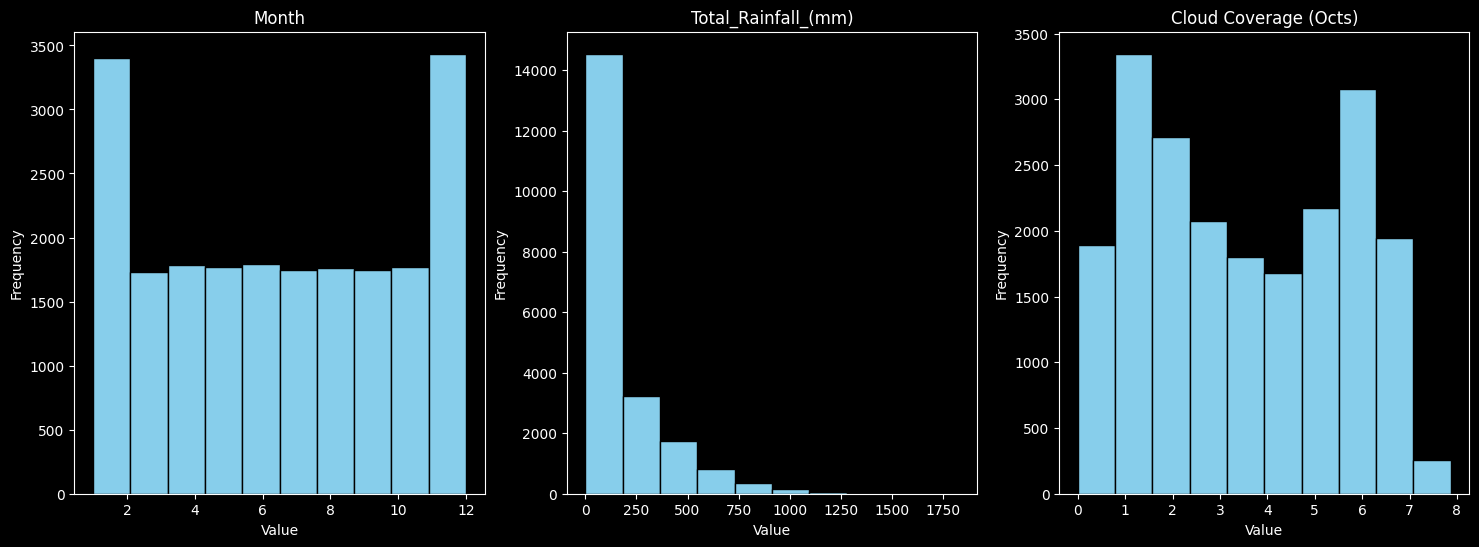

In [31]:
# Define attributes (columns) for which you want to plot histograms
attributes = df.columns

# Set up subplots (3 plots in a row)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Adjust figsize as needed



# Plot histograms for each attribute
for i, attribute in enumerate(attributes):
    ax = axes[i]  # Select the appropriate subplot
    ax.hist(df[attribute], bins=10, color='skyblue', edgecolor='black')  # Plot histogram
    ax.set_title(attribute)  # Set subplot title
    ax.set_xlabel('Value')  # Set x-axis label
    ax.set_ylabel('Frequency')  # Set y-axis label

# Adjust layout and spacing
plt.tight_layout()

# Show the plots
plt.show()